In [1]:
!pip install scikit-learn

In [2]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 4.5 MB/s 


In [3]:
!pip3 install pandas-datareader

In [4]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 3.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as web

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statistics

In [26]:
#Load Data
company = 'FB'

start = dt.datetime(2012, 1, 1)
end = dt.datetime(2022, 5, 22)

data = web.DataReader(company, 'yahoo', start, end)

In [27]:
#Prepare Data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train=[]
y_train=[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [28]:
#Build the Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

'''Test the model accuracy on existing data'''

Epoch 1/25
77/77 [==============================] - 14s 100ms/step - loss: 0.0175
Epoch 2/25
77/77 [==============================] - 8s 98ms/step - loss: 0.0034
Epoch 3/25
77/77 [==============================] - 7s 97ms/step - loss: 0.0030
Epoch 4/25
77/77 [==============================] - 7s 97ms/step - loss: 0.0025
Epoch 5/25
77/77 [==============================] - 8s 99ms/step - loss: 0.0026
Epoch 6/25
77/77 [==============================] - 7s 96ms/step - loss: 0.0022
Epoch 7/25
77/77 [==============================] - 7s 97ms/step - loss: 0.0022
Epoch 8/25
77/77 [==============================] - 7s 97ms/step - loss: 0.0019
Epoch 9/25
77/77 [==============================] - 7s 97ms/step - loss: 0.0017
Epoch 10/25
77/77 [==============================] - 8s 98ms/step - loss: 0.0017
Epoch 11/25
77/77 [==============================] - 8s 100ms/step - loss: 0.0018
Epoch 12/25
77/77 [==============================] - 8s 100ms/step - loss: 0.0017
Epoch 13/25
77/77 [==============

'Test the model accuracy on existing data'

In [29]:
#Load Test Data
test_start=dt.datetime(2020, 1, 1)
test_end=dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices=test_data['Close'].values

total_dataset=pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

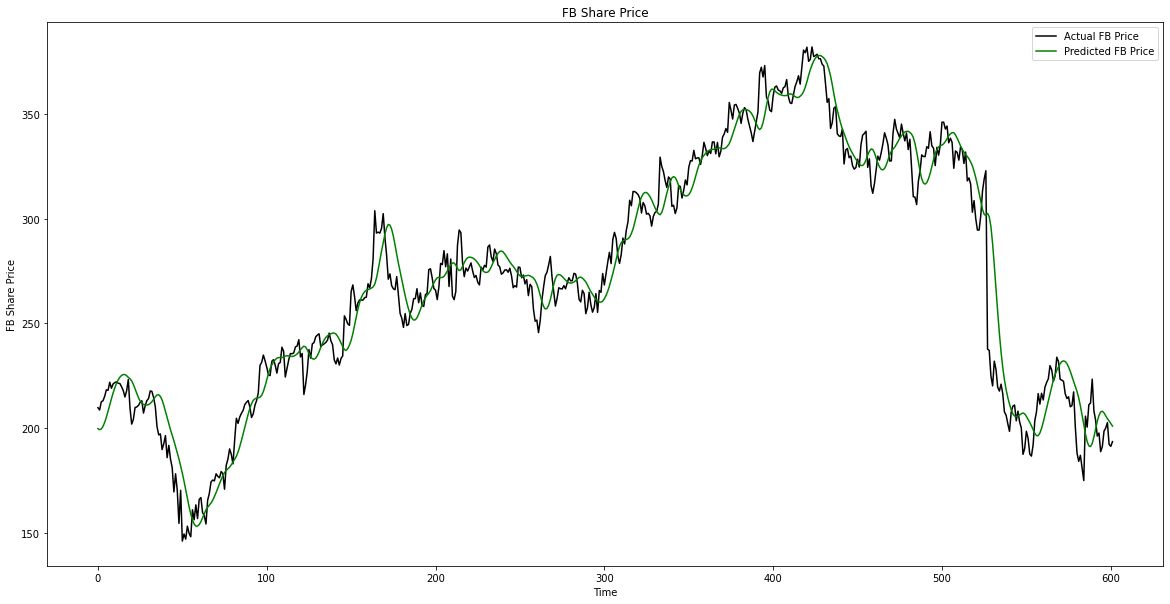

In [30]:
# Make Predictions on Test Data
x_test=[]

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color = "black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()



In [31]:
#Predict Next Day

real_data = [model_inputs[len(model_inputs)-prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data=np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))



In [32]:
prediction=model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[199.7502]]
